**Q1**</br> ChatGPT link: https://chatgpt.com/share/673a3c06-1c9c-8002-884e-ac467d25cdf5</br>
Summary of Interactions
Understanding Classification Decision Trees:

Discussed the purpose of classification decision trees, emphasizing their role in solving classification problems where the goal is to assign inputs to predefined categories.
Provided real-world examples of applications, including healthcare (disease diagnosis), finance (credit risk assessment), e-commerce (customer segmentation), and more.
Highlighted why classification decision trees are effective, including their interpretability, ability to handle missing data, and capability to capture non-linear relationships.
Translation to Chinese:

Translated the explanation of classification decision trees into Chinese, retaining the detailed examples and structured format to ensure clarity and understanding.
Comparison of Classification Decision Trees and Multiple Linear Regression:

Differentiated how classification decision trees make predictions (categorical outputs through tree traversal) versus how multiple linear regression predicts continuous outputs (using a linear equation).
Highlighted key differences in problem type, prediction mechanism, handling of non-linearity, interpretability, and sensitivity to data.
Included examples to illustrate their distinct applications, such as predicting customer purchase likelihood (tree) versus predicting sales revenue (regression).


**Q2** </br>
By looking the formula, accuracy is good when the data set is balanced, which means similar number of data in each catagory. Like image identification of cats and dogs.</br>
By looking the formula, sensitivity is good when we need to identify more true data, e.g. healthcare detecting, which will cause severe consequence like COVID-19 if there is a FN.</br>
By looking the formula, specificity is good when we what to minimize false positive, e.g. We want to find whether a child have gifts on math(no talent is positive), one way is just saying that everyone have no that talent, all other 3 metrics are high, but specificity is 0.(This is a famous chinese meme oriented from anxiety of parents hoping their children being good at math)</br>
By looking the formula, precision is good when false positive is costly, e.g. industrial product detection, high precision lowers the probability of recall products.


ChatGPT: https://chatgpt.com/share/673a3c06-1c9c-8002-884e-ac467d25cdf5
Summary of Interactions
Classification Decision Trees:

We discussed how classification decision trees solve classification problems by assigning inputs to predefined categories.
Real-world applications included healthcare (disease diagnosis), finance (credit risk assessment), and e-commerce (customer segmentation).
I also provided a Chinese translation of the explanation.
Comparison of Classification Decision Trees and Multiple Linear Regression:

I explained how classification decision trees handle categorical outputs through tree traversal, while multiple linear regression predicts continuous outputs using a linear equation.
The discussion highlighted key differences in problem types, prediction mechanisms, handling of non-linearity, and interpretability, with examples to illustrate these distinctions.
Metrics for Model Evaluation:

We examined four metrics—accuracy, sensitivity, specificity, and precision—with their formulas and definitions.
I described real-world applications for each metric:
Accuracy: Suitable for balanced datasets, e.g., spam detection.
Sensitivity: Important for detecting critical positives, e.g., disease diagnosis.
Specificity: Useful for minimizing false positives, e.g., rare disease screening.
Precision: Key when false positives are costly, e.g., fraud detection.
I provided a Chinese translation of this section for added clarity.

**Q3**

In [23]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')
ab_reduced_noNaN.dtypes

/tmp/ipykernel_85/1083542547.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_85/1083542547.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_85/1083542547.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object

**Q4**

In [24]:
from sklearn.model_selection import train_test_split

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

print(f"Training data set has {train_size} observations.")
print(f"Test data set has {test_size} observations.")

Training data set has 255 observations.
Test data set has 64 observations.


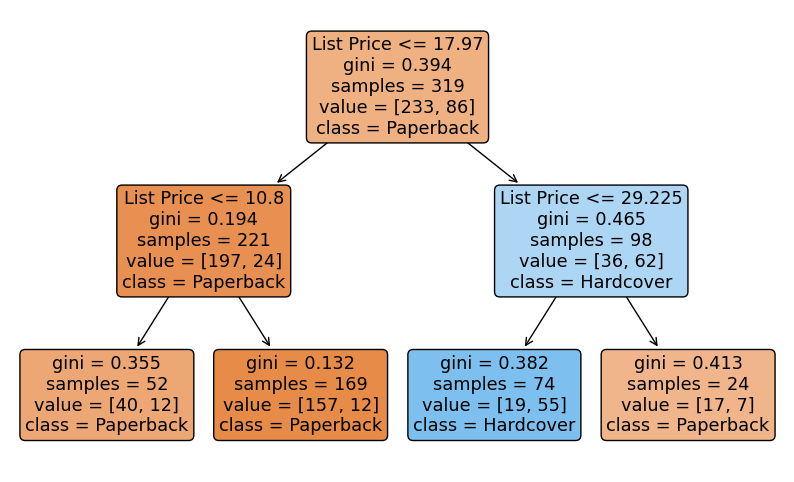

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable
X1 = ab_reduced_noNaN[['List Price']]  # Feature variable

# Train the classification tree with a max depth of 2
clf1 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf1.fit(X1, y)

# Visualize the tree
plt.figure(figsize=(10, 6))
tree.plot_tree(
    clf1, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.show()


Firstly, it decide whether list price is <= 17.97(top layer), then it decide whether list price is <= 10.8 (the orange one) or is <= 29.225(the light-blue one) then the final catogory is decided.

gpt: https://chatgpt.com/share/673a3c06-1c9c-8002-884e-ac467d25cdf5  <br>
Summary of Interactions
Decision Trees and Classification Problems:

We discussed the purpose and workings of classification decision trees, emphasizing their ability to solve classification problems where inputs are assigned to predefined categories (e.g., hardcover vs. paperback books).
I also provided a Chinese translation of this discussion for added context.
Comparison Between Classification Decision Trees and Multiple Linear Regression:

We compared how decision trees predict categorical outputs through tree traversal versus multiple linear regression predicting continuous outputs using a linear equation.
I highlighted key differences in prediction mechanisms, interpretability, handling of non-linear data, and sensitivity to data noise.
This comparison included real-world application scenarios to illustrate their use cases.
Model Evaluation Metrics:

I explained four common evaluation metrics—accuracy, sensitivity, specificity, and precision—and described their practical applications.
For each metric, I discussed appropriate use cases, with examples like healthcare diagnostics, fraud detection, spam email classification, and targeted marketing.
Training a Decision Tree Classifier:

We walked through the process of training a DecisionTreeClassifier using only the "List Price" variable to predict whether a book is a hardcover or paperback.
I wrote code to train the classifier with a maximum depth of 2, and visualized the decision tree using tree.plot_tree(clf) to understand how predictions are made based on "List Price".


**Q5**

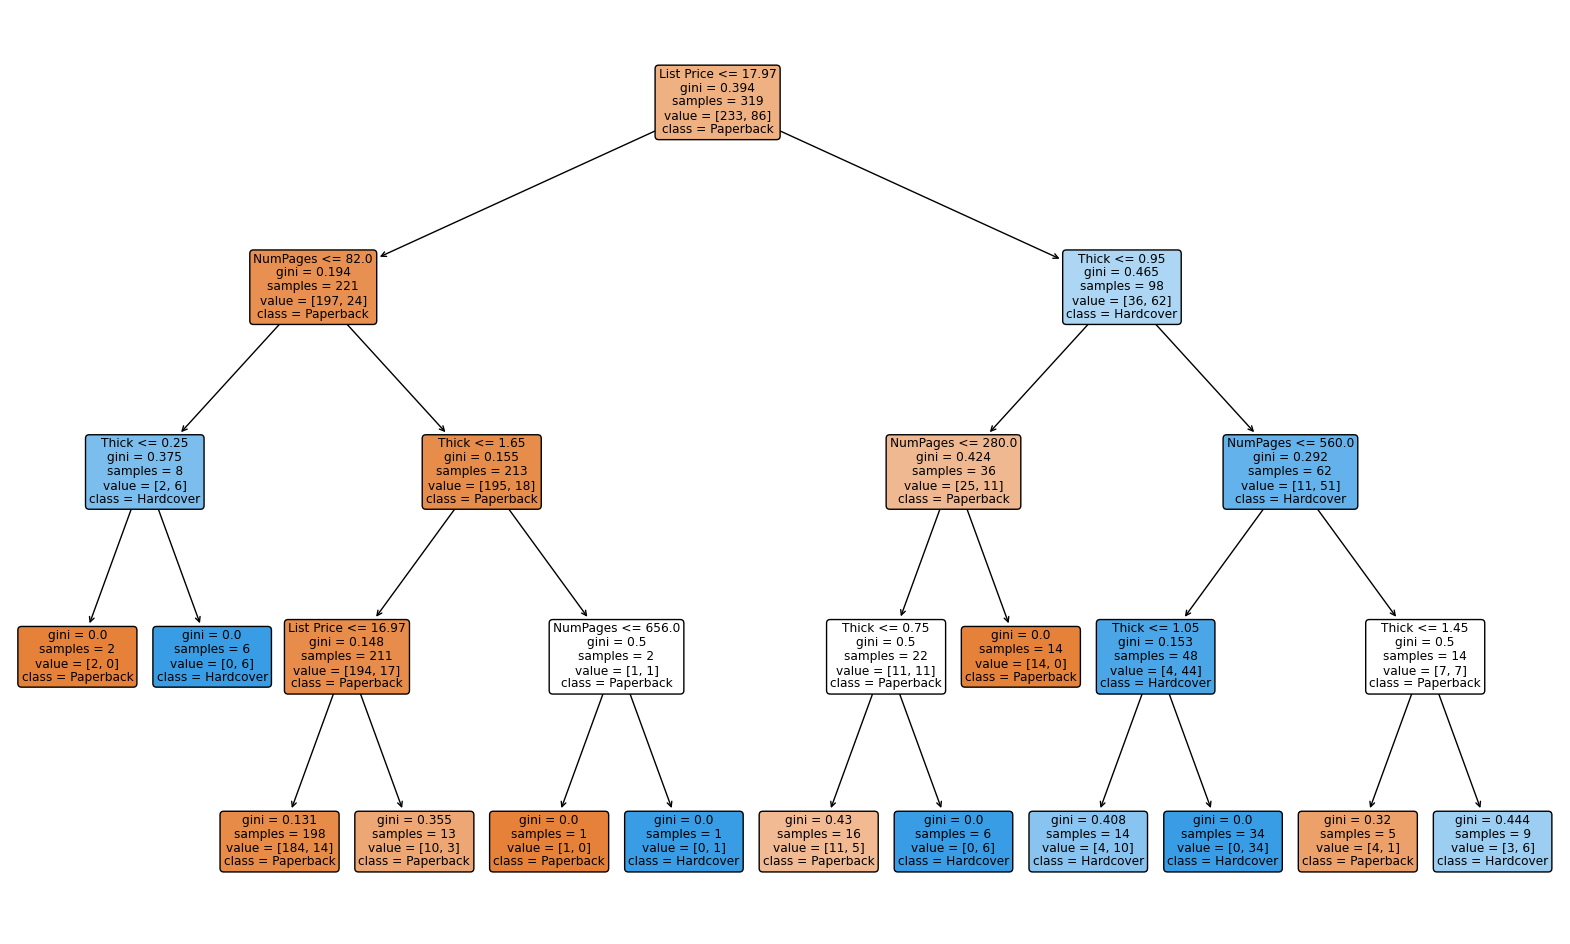

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the data
Y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
# ab_reduced_noNaN_train.Y = Y
# Train the classification tree with a max depth of 2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, Y)

# Visualize the tree
plt.figure(figsize=(20, 12))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.show()

**Q6**

Accuracy: 0.89
Sensitivity (Recall): 0.85
Specificity: 2.00


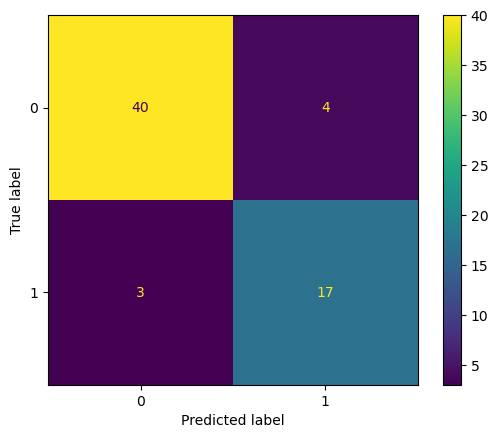

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming ab_reduced_noNaN_test is prepared
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable for test set
X1_test = ab_reduced_noNaN_test[['List Price']]  # Feature variable for test set

# Make predictions
y_pred1 = clf.predict(X1_test)

# Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm1).plot()

# Extract values from confusion matrix
TN, FP, FN, TP = cm1.ravel()

# Metrics calculations
accuracy = (TP + TN) / (TP + FN + TN + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TP + FN)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.94
Sensitivity (Recall): 0.90
Specificity: 2.10


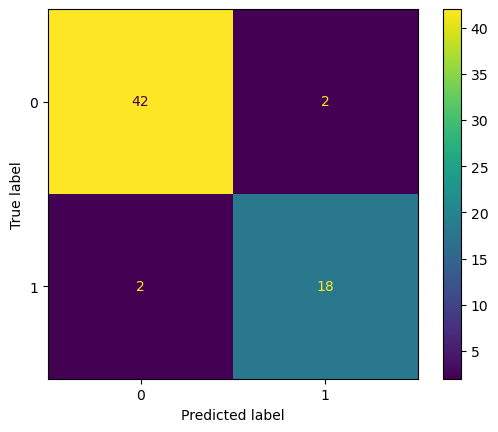

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming ab_reduced_noNaN_test is prepared
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable for test set
X2_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Feature variable for test set

# Make predictions
y_pred2 = clf2.predict(X2_test)

# Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm2).plot()

# Extract values from confusion matrix
TN, FP, FN, TP = cm2.ravel()

# Metrics calculations
accuracy = (TP + TN) / (TP + FN + TN + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TP + FN)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


**Q7**

Accuracy: 0.83
Sensitivity (Recall): 0.58
Specificity: 2.64


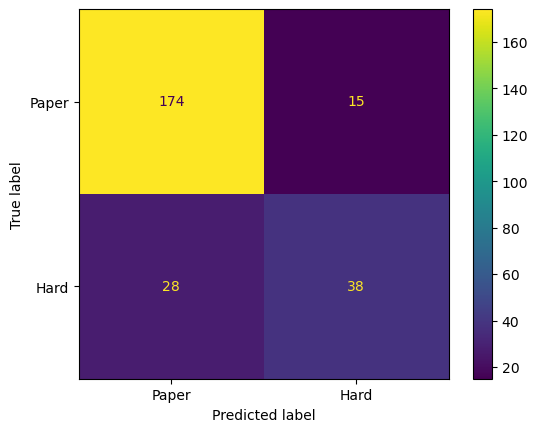

In [52]:
cm3 = confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=='H',
                       clf.predict(ab_reduced_noNaN_train[['List Price']]),
                       labels=[0, 1])
ConfusionMatrixDisplay(cm3, display_labels=["Paper","Hard"]).plot()

TN, FP, FN, TP = cm3.ravel()

accuracy = (TP + TN)/(TP + FN + TN + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TP + FN)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.90
Sensitivity (Recall): 0.68
Specificity: 2.79


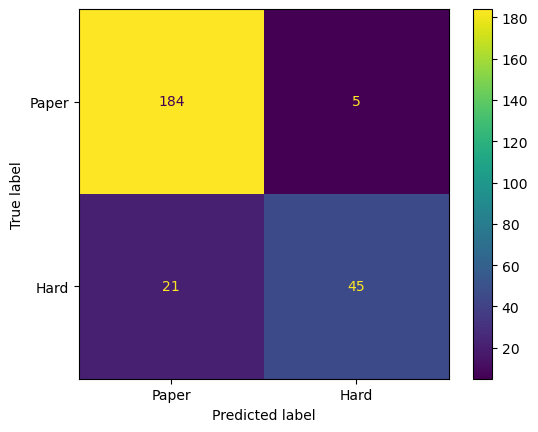

In [54]:
cm4 = confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=='H', 
                       clf2.predict(ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                       labels=[0, 1])
ConfusionMatrixDisplay(cm4, display_labels=["Paper","Hard"]).plot()

TN, FP, FN, TP = cm4.ravel()

accuracy = (TP + TN)/(TP + FN + TN + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TP + FN)

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

To clarify, let me draw a table for helping understanding<br>
TN FP<br>
FN TP<br>
what is causing the differences between the following two confusion matrices below?<br>
Their difference is because the dicistion tree for the second is much more complex so it can divide and select precisely.<br>
why the two confusion matrices above (for clf and clf2) are better?<br>
For clf, Accuracy is better: 0.89>0.83, 
Sensitivity (Recall)is also better: 0.8 > 0.58, only sepcificity is worse. So above one is better on more aspects. For clf2, the reasoning is same and comparison is similar.

**Q8**

Feature Importances:
      Feature  Importance
2  List Price    0.493675
1       Thick    0.299688
0    NumPages    0.206637


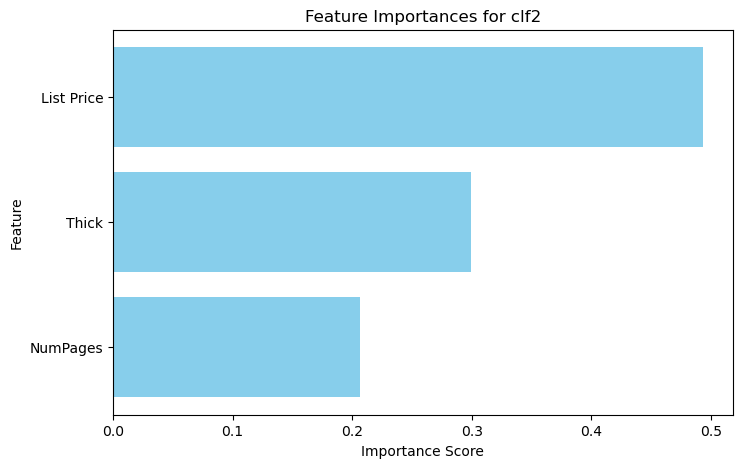


The most important feature is 'List Price' with an importance score of 0.49.


In [19]:
# Visualize feature importances for clf2
import pandas as pd
import matplotlib.pyplot as plt

# Feature importances
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the most important feature
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances for clf2")
plt.gca().invert_yaxis()
plt.show()

# Report the most important feature
most_important_feature = importance_df.iloc[0]
print(f"\nThe most important feature is '{most_important_feature['Feature']}' with an importance score of {most_important_feature['Importance']:.2f}.")


**Q9**: Describe the differences of interpreting coefficients in linear model regression (former) versus feature importances in decision trees (latter) in two to three sentences<br>
Former give continuous result while latter is binary (or catagorical) result. i.e., former directly shows strength and direction of the relationship(positively or negatively related), but latter is just a relative measure of contribution. Also, former can be easily affected by extreme value and based on assumption of normal distribution, while latter did not do those assumption but only dividing area (the example shown in lecture).

**Q10** No